In [45]:
from scipy.integrate import solve_ivp # solve init. value problem
import numpy as np
import matplotlib.pyplot as plt

### Warmup
#### a)

In [46]:
# Parameters for the Rossler system
a = 0.2
b = 0.2
c = 5.7

# The Rossler system of differential equations
# Of a form s.th. it is accepted by the solve_ivp function
# The function must be of f(t, y) where t is the time and y is the state of the system
# (despite the Rossler system being autonomous, the function must take t as an argument)
def rossler_system(t, init_state):
    """
    Calculates the derivatives of the Rossler system at a given time and initial state.

    Parameters:
    t (float): The time at which to evaluate the derivatives.
    init_state (list): The initial state of the system [x, y, z].

    Returns:
    list: The derivatives of the Rossler system [dx_dt, dy_dt, dz_dt].
    """
    x, y, z = init_state
    dx_dt = -y - z 
    dy_dt = x + a * y
    dz_dt = b + z * (x - c)
    return [dx_dt, dy_dt, dz_dt]

# Initial conditions
initial_conditions = [0.001, 0.001, 0.001]

# Time span for the integration
t_span = (0, 400)
# Time points where the solution is calculated
t_eval = np.linspace(*t_span, 30000) # *t_span is unpacking the t_span iterable 
                                     # into arguments for the np.linspace function

# Solving the Rossler system
solution = solve_ivp(rossler_system, t_span, initial_conditions, 
                     method='RK45', t_eval=t_eval, rtol=1e-9, atol=1e-12)

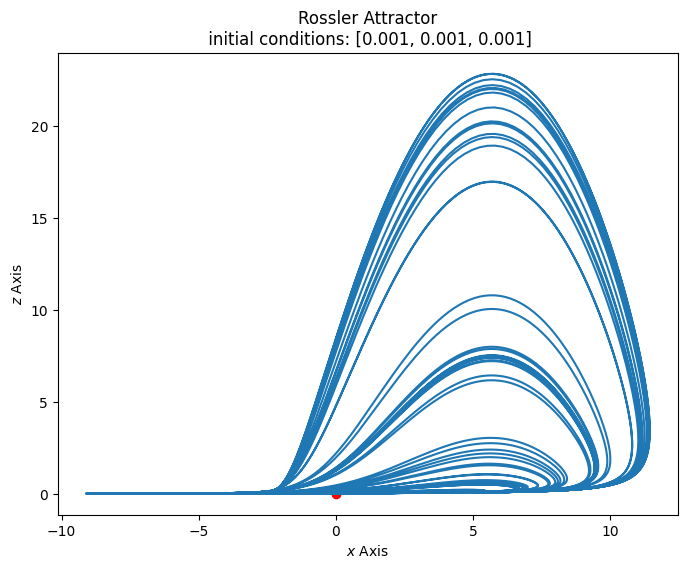

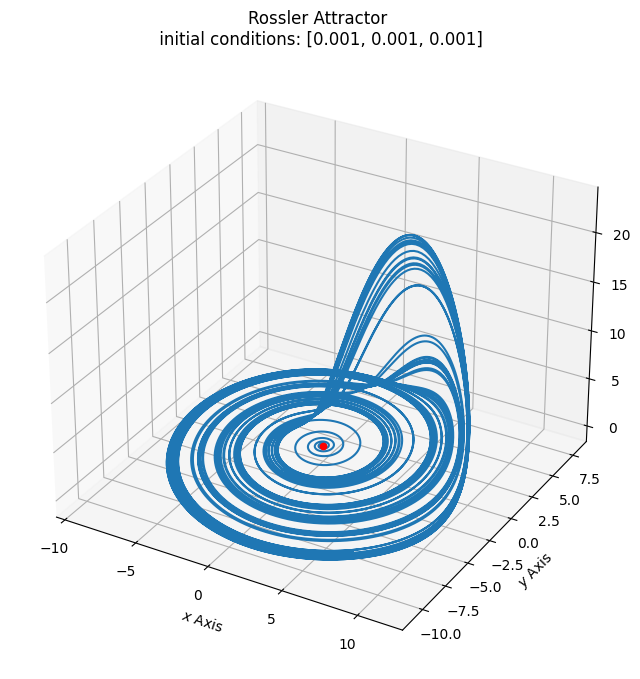

In [47]:
def plot_rossler_3d(solution, init_conds=initial_conditions, save_path='NONE'):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(projection='3d')
    ax.plot(solution.y[0], solution.y[1], solution.y[2])
    # plot red dot at the start
    ax.scatter(solution.y[0, 0], solution.y[1, 0], solution.y[2, 0], color='red')
    ax.set_title("Rossler Attractor\n initial conditions: {}".format(init_conds))
    ax.set_xlabel(r"$x$ Axis")
    ax.set_ylabel(r"$y$ Axis")
    ax.set_zlabel(r"$z$ Axis")
    if save_path != 'NONE':
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

def plot_rossler_xz(solution, init_conds=initial_conditions, save_path='NONE'):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot()
    ax.plot(solution.y[0], solution.y[2])
    ax.scatter(solution.y[0, 0], solution.y[2, 0], color='red')
    ax.set_title("Rossler Attractor\n initial conditions: {}".format(init_conds))
    ax.set_xlabel(r"$x$ Axis")
    ax.set_ylabel(r"$z$ Axis")
    if save_path != 'NONE':
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

plot_rossler_xz(solution, save_path='rossler_xz.png')
plot_rossler_3d(solution, save_path='rossler_3d.png')

### Challenge
#### a) z vs t

In [48]:
# Time span for the integration
t_span = (0, 400)
# Time points where the solution is calculated
t_eval = np.linspace(*t_span, 30000)

solution = solve_ivp(rossler_system, t_span, initial_conditions, 
                     method='RK45', t_eval=t_eval, rtol=1e-9, atol=1e-12)


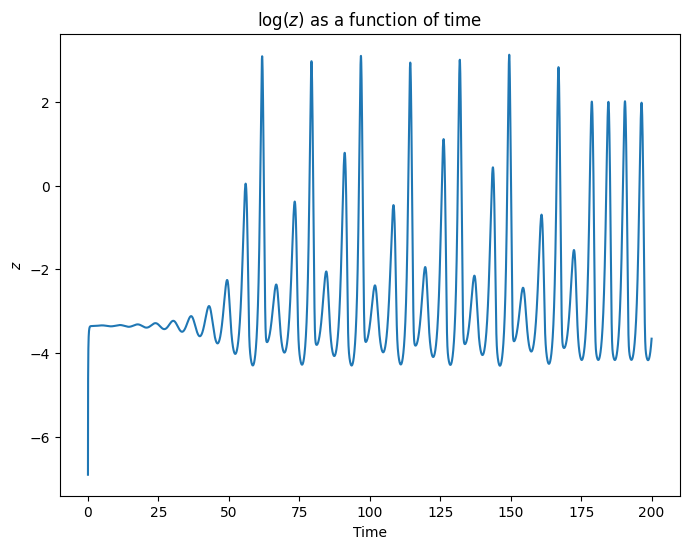

In [49]:
# Now plot z as a function of time
plt.figure(figsize=(8, 6))
starting_point = 0
stopping_point = 15000
plt.plot(solution.t[starting_point:stopping_point], np.log(solution.y[2][starting_point:stopping_point]))
plt.xlabel("Time")
plt.ylabel(r"$z$")
plt.title(r"$\log(z)$ as a function of time")
plt.savefig("rossler_z_long.png", dpi=300, bbox_inches='tight')
plt.show()

#### b) z_n+1 vs z_n

In [50]:
# Time span for the integration
t_span = (0, 10**4)
# Time points where the solution is calculated
t_eval = np.linspace(*t_span, 10**5) 

solution = solve_ivp(rossler_system, t_span, initial_conditions, 
                     method='RK45', t_eval=t_eval, rtol=1e-5, atol=1e-7)

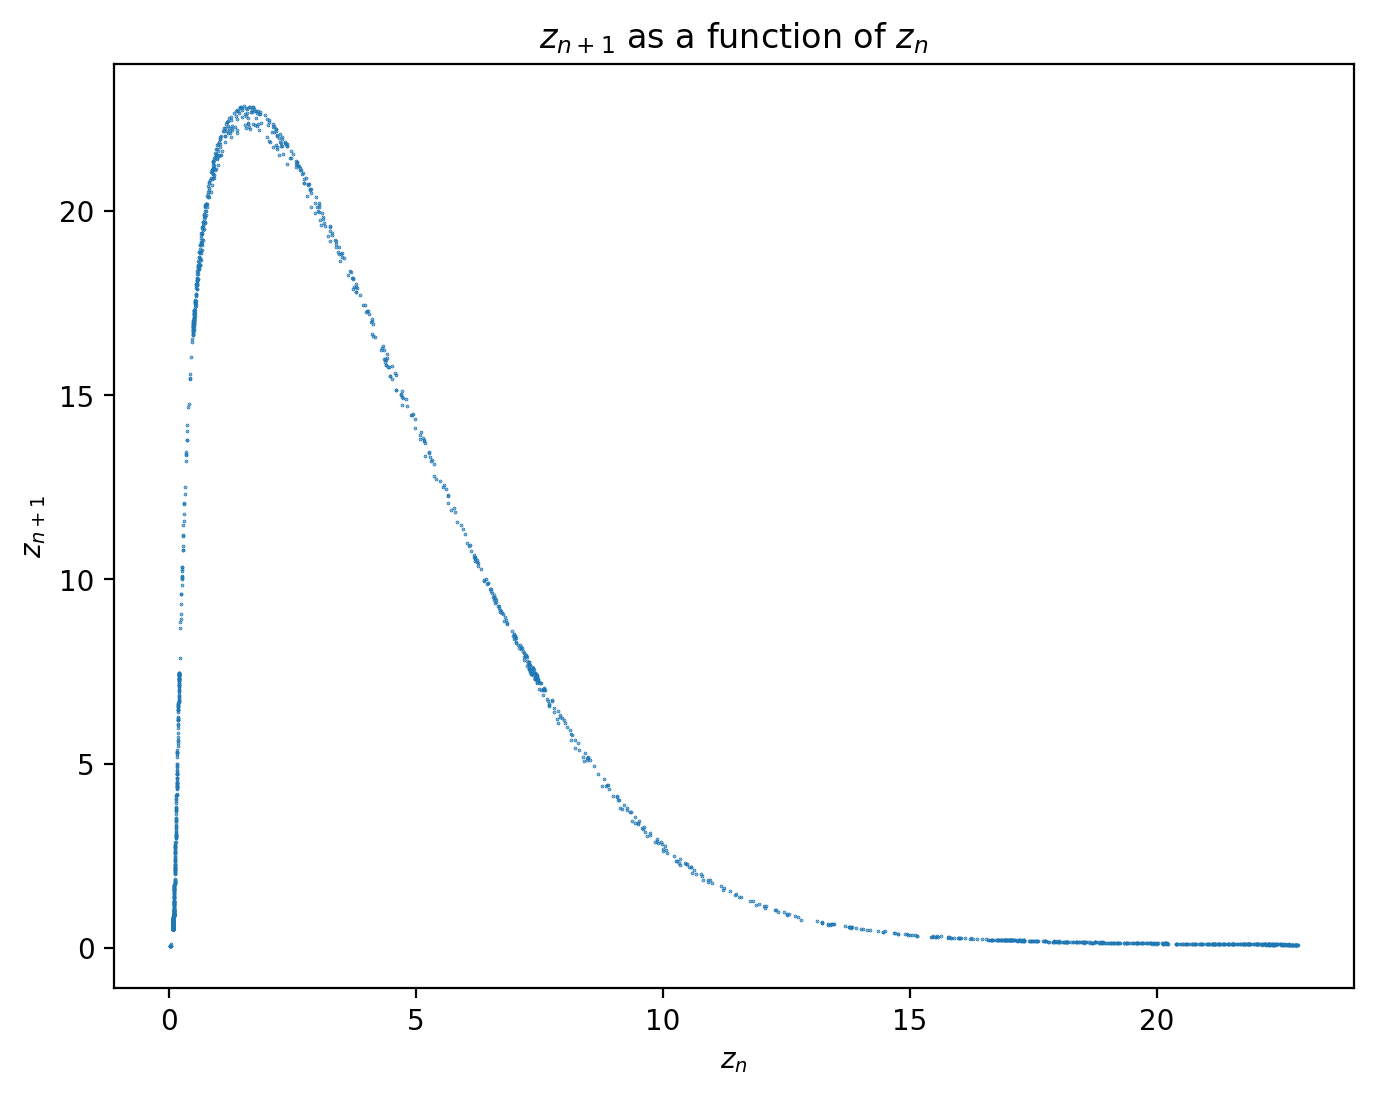

In [51]:
# Search through the z value to store all the maxima values of z
def find_z_maximas(solution):
    z_maximas = []
    z = solution.y[2]
    for i in range(1, len(z) - 1):
        if z[i] > z[i - 1] and z[i] > z[i + 1]:
            z_maximas.append(z[i])
    return z_maximas

z_maximas = find_z_maximas(solution)

# plot z_maximas[n+1] as a function of z_maximas[n]
# Plot  1/10 of the data to avoid clutter
plt.figure(figsize=(8, 6), dpi=200)
# do a scatter plot to see the individual points
plt.scatter(z_maximas[:-1:1], z_maximas[1::1], s=0.1)
plt.xlabel(r"$z_{n}$")
plt.ylabel(r"$z_{n+1}$")
plt.title(r"$z_{n+1}$ as a function of $z_{n}$")
plt.savefig("rossler_z_n+1.png", dpi=300, bbox_inches='tight')
plt.show() 

### Lyapunov exponent
#### i) Initialize problem

In [52]:
# create a vector of random length from a point
def random_vector_from_pt(point, length=10**-6):
    # Generate a random vector 
    v = np.random.randn(3) 

    # Normalize v to have unit length and scale it for the desired length
    v_scaled = (v / np.linalg.norm(v))*length
    return point + v_scaled

Length of x_0:  1e-06


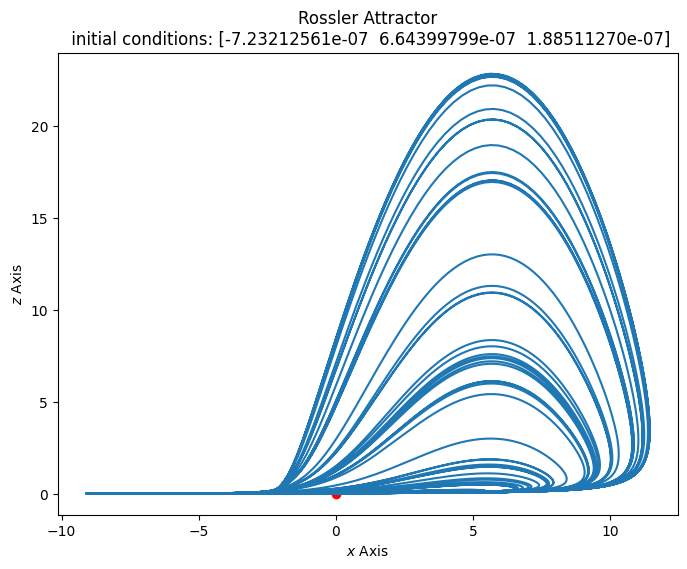

In [53]:
# Set a custom seed for reproducibility
np.random.seed(123)

# Initial conditions
x_0 = random_vector_from_pt([0, 0, 0])
# print length of x_0
print("Length of x_0: ",np.linalg.norm(x_0))

# Time span for the integration
t_span = (0, 400)
# Time points where the solution is calculated
t_eval = np.linspace(*t_span, 30000)# *t_span is unpacking the t_span iterable 
                                     # into arguments for the np.linspace function

# Solving the Rossler system
solution = solve_ivp(rossler_system, t_span, x_0, 
                     method='RK45', t_eval=t_eval, rtol=1e-9, atol=1e-12)

plot_rossler_xz(solution, init_conds=x_0, save_path='rossler_xz_random.png')

#### ii) Create x_1 from new x_0

In [54]:
# set x_0 as the final state of the previous solution
x_0 = solution.y[:, -1]

x_1 = random_vector_from_pt(x_0)

print("distance between x_0 and x_1: ", np.linalg.norm(np.array(x_0) - np.array(x_1)))

distance between x_0 and x_1:  1.0000000000951925e-06


#### iii) Integrate further

In [55]:
# Time span for the integration
t_span = (0, 200)
# Time points where the solution is calculated
t_eval = np.linspace(*t_span, 30000)# *t_span is unpacking the t_span iterable 
                                     # into arguments for the np.linspace function

# Solving the Rossler system
solution_x0 = solve_ivp(rossler_system, t_span, x_0, 
                     method='RK45', t_eval=t_eval, rtol=1e-9, atol=1e-12)
solution_x1 = solve_ivp(rossler_system, t_span, x_1, 
                     method='RK45', t_eval=t_eval, rtol=1e-9, atol=1e-12)

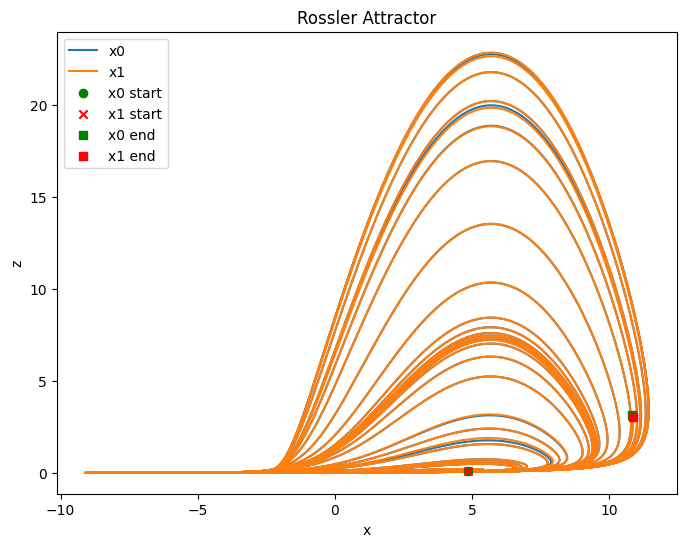

In [56]:
# plot the two solutions in the xz plane
plt.figure(figsize=(8, 6))
plt.plot(solution_x0.y[0], solution_x0.y[2], label="x0", zorder=1)
plt.plot(solution_x1.y[0], solution_x1.y[2], label="x1", zorder=1)
# plot the starting points
plt.scatter(solution_x0.y[0, 0], solution_x0.y[2, 0], color='green', label="x0 start", zorder=2)
plt.scatter(solution_x1.y[0, 0], solution_x1.y[2, 0], color='red',marker='x', label="x1 start", zorder=2)
# plot the end points
plt.scatter(solution_x0.y[0, -1], solution_x0.y[2, -1], color='green', marker=',', label="x0 end", zorder=3)
plt.scatter(solution_x1.y[0, -1], solution_x1.y[2, -1], color='red', marker=',', label="x1 end", zorder=3)
plt.xlabel("x")
plt.ylabel("z")
plt.legend()
plt.title("Rossler Attractor")
plt.savefig("rossler_xz_x0_x1_random.png", dpi=300, bbox_inches='tight')
plt.show()

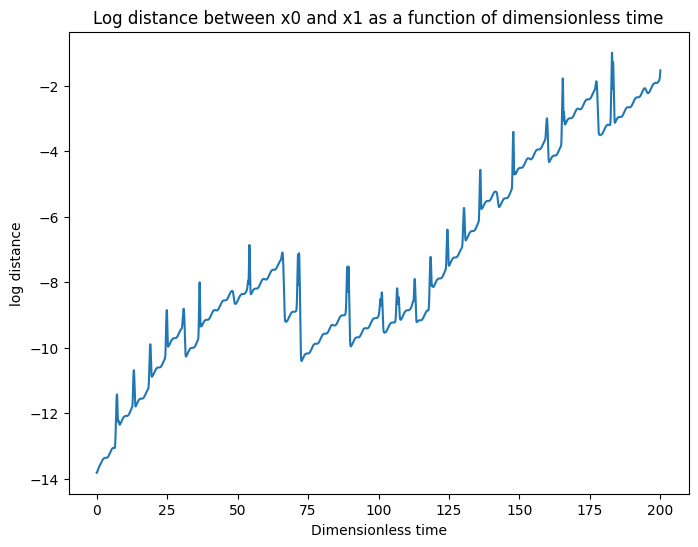

In [57]:
# elementwise distance between the two solutions
distance = np.linalg.norm(solution_x0.y - solution_x1.y, axis=0)

# plot the log distance as a function of dimensionless time
plt.figure(figsize=(8, 6))
plt.plot(solution_x0.t, np.log(distance))
plt.xlabel("Dimensionless time")
plt.ylabel("log distance")
plt.title("Log distance between x0 and x1 as a function of dimensionless time")
plt.savefig("rossler_log_distance.png", dpi=300, bbox_inches='tight')
plt.show()

In [58]:
# Create a function that does the whole process n times
def separation_distance(n, time2=200, rel_tol=1e-9, abs_tol=1e-12):
    """
    Calculate the separation distance between two solutions of the Rossler system.

    Parameters:
    n (int): The number of times to calculate the separation distance.
    x_0 (list): The initial state of the system.
    v (list): The random vector to add to x_0.

    Returns:
    list: The separation distances between the two solutions.
    """
    distances = []
    for i in range(n):
        # Set a custom seed for reproducibility
        np.random.seed(123+i)

        """Generate an appropriate x_0"""
        # Initial conditions
        x_0 = random_vector_from_pt([0, 0, 0])

        # Time span for the integration
        t_span = (0, 400)
        # Time points where the solution is calculated
        t_eval = np.linspace(*t_span, 30000)# *t_span is unpacking the t_span iterable 
                                            # into arguments for the np.linspace function

        # Solving the Rossler system
        solution = solve_ivp(rossler_system, t_span, x_0, 
                     method='RK45', t_eval=t_eval, rtol=rel_tol, atol=abs_tol)
        
        # set x_0 as the final state of the previous solution
        x_0 = solution.y[:, -1]

        """Calculate x_1 and the separation distance between x_0 and x_1 for the new time span"""
        # Generate a random vector 
        x_1 = random_vector_from_pt(x_0)

        # Time span for the integration
        t_span = (0, time2)
        # Time points where the solution is calculated
        t_eval = np.linspace(*t_span, 30000)# *t_span is unpacking the t_span iterable 
                                            # into arguments for the np.linspace function

        # Solving the Rossler system
        solution_x0 = solve_ivp(rossler_system, t_span, x_0, 
                            method='RK45', t_eval=t_eval, rtol=rel_tol, atol=abs_tol)
        solution_x1 = solve_ivp(rossler_system, t_span, x_1, 
                            method='RK45', t_eval=t_eval, rtol=rel_tol, atol=abs_tol)

        # elementwise distance between the two solutions
        distance = np.linalg.norm(solution_x0.y - solution_x1.y, axis=0)
        distances.append(distance)
    return distances

# Calculate the separation distance 10 times
distances = separation_distance(10)

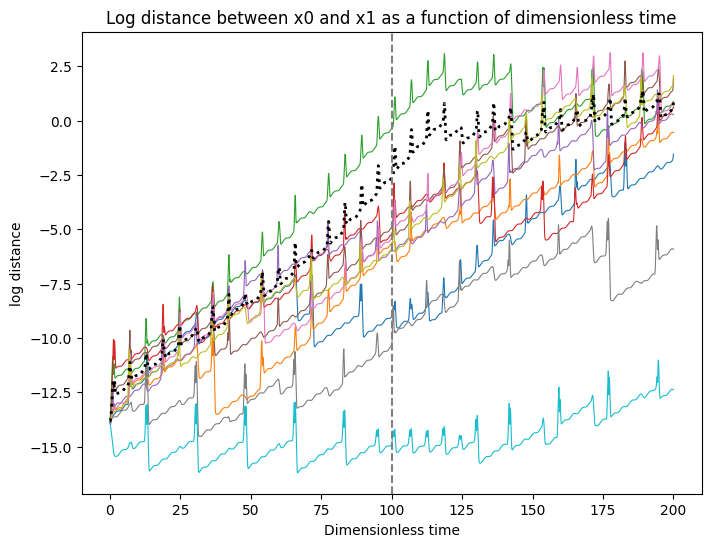

In [59]:
# plot the log distance as a function of dimensionless time for each run
plt.figure(figsize=(8, 6))
for distance in distances:
    plt.plot(solution_x0.t, np.log(distance), linewidth = 0.8)
# plot the avarage of all the distances
plt.plot(solution_x0.t, np.log(np.mean(distances, axis=0)), linestyle=':', linewidth = 2, color='black', label="mean")
plt.axvline(x=100, color='grey', linestyle='--', label="x=15")
plt.xlabel("Dimensionless time")
plt.ylabel("log distance")
plt.title("Log distance between x0 and x1 as a function of dimensionless time")
plt.savefig("rossler_log_distance_10.png", dpi=300, bbox_inches='tight')
plt.show()

In [60]:
cutoff_time = 100
log_distances = np.log(separation_distance(1, time2=cutoff_time))

Slope of the fit:  0.03336139584932619


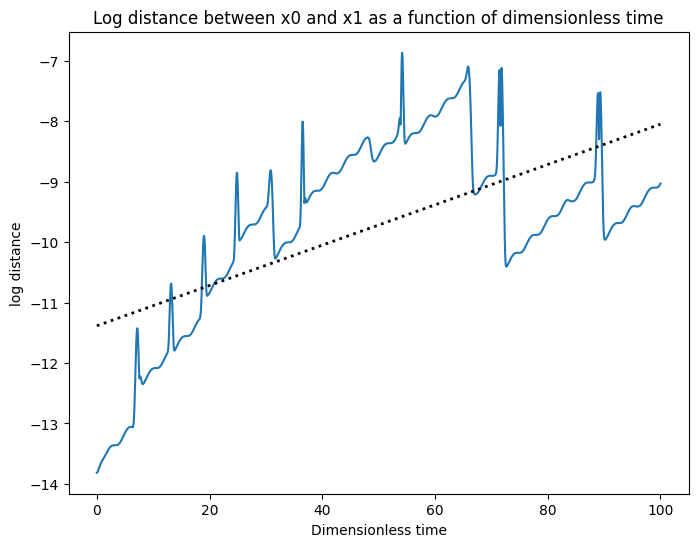

In [61]:
t_span = (0, cutoff_time)
# Time points where the solution is calculated
t_eval = np.linspace(*t_span, 30000)

# fit a polynomial of degree 1 to log_distances
coeffs = np.polyfit(t_eval, log_distances[0], 1) #returns the coefficients of the fitted polynomial, in decreasing powers
log_distances_fit = np.polyval(coeffs, t_eval)

print("Slope of the fit: ", coeffs[0])

plt.figure(figsize=(8, 6))
plt.plot(t_eval, log_distances[0])
plt.plot(t_eval, log_distances_fit, linestyle=':', linewidth = 2, color='black', label="fit")
plt.xlabel("Dimensionless time")
plt.ylabel("log distance")
plt.title("Log distance between x0 and x1 as a function of dimensionless time")
plt.savefig("rossler_log_distance_fit.png", dpi=300, bbox_inches='tight')
plt.show()

#### iv) Lyapunov improved estimate

In [62]:
cutoff_time = 100
log_distances = np.log(separation_distance(100, time2=cutoff_time, rel_tol=1e-4, abs_tol=1e-5))

t_span = (0, cutoff_time)
# Time points where the solution is calculated
t_eval = np.linspace(*t_span, 30000)

lyapunov_exponents = []

for i in range(len(log_distances)):
    # fit a polynomial of degree 1 to log_distances
    coeffs = np.polyfit(t_eval, log_distances[i], 1) #returns the coefficients of the fitted polynomial, in decreasing powers
    lyapunov_exponents.append(coeffs[0])

lyap_exp_mean = np.mean(lyapunov_exponents)
print("Mean Lyapunov exponent: ", lyap_exp_mean)

Mean Lyapunov exponent:  0.07086027154394121


^ Much smaller than for the Lorentz attractor! This makes some intuitive sence, since the time it takes for this function to "take form" is much longer. 

In [63]:
"""
use on an objext such as ax or fig
ax = fig.add_subplot()

to import it to your environment:
import sys
sys.path.append('C:/Users/rannu/OneDrive - NTNU/Desktop/VsPython/'+\
                'custom_functions')
from matplot_darkmode import plot_darkmode
"""
def plot_darkmode(object):
    # make background black, and text and axes white
    # Set the face color of the figure to black (outside the axes)
    plt.gcf().set_facecolor('black')
    object.set_facecolor('black')
    object.xaxis.label.set_color('white')
    object.yaxis.label.set_color('white')
    object.tick_params(axis='x', colors='white')
    object.tick_params(axis='y', colors='white')
    plt.gca().spines['bottom'].set_color('white')
    plt.gca().spines['top'].set_color('white')
    plt.gca().spines['right'].set_color('white')
    plt.gca().spines['left'].set_color('white')
    return 0

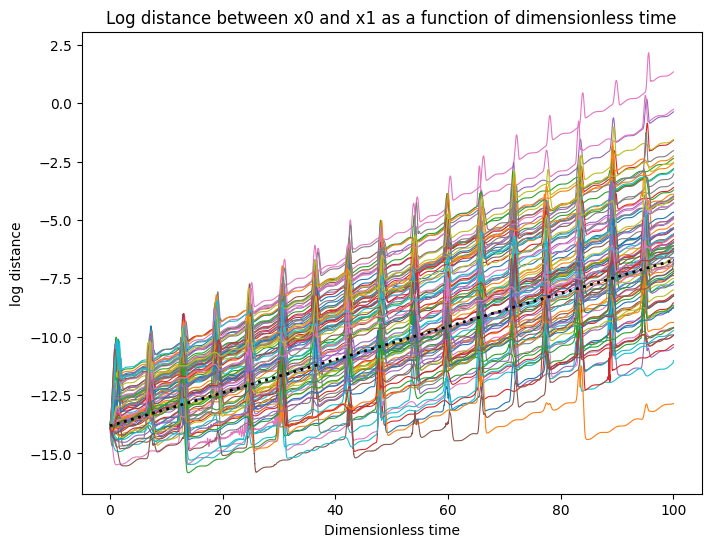

In [64]:
fig = plt.figure(figsize=(8, 6))
for distance in log_distances:
    plt.plot(t_eval, distance, linewidth = 0.8)
# plot the slope (10**-6)*np.exp(lyap_exp_mean*t) 
plt.plot(t_eval, np.log((10**-6)*np.exp(lyap_exp_mean*t_eval)), linestyle=':', linewidth = 2, color='black', label="fit")
plt.xlabel("Dimensionless time")
plt.ylabel("log distance")
plt.title("Log distance between x0 and x1 as a function of dimensionless time")
plt.savefig("rossler_log_distance_100.png", dpi=300, bbox_inches='tight')
plt.show()
